# **\[GML\]** Chap1: 시작하기 - networkx로 그래프 이해하기

신록예찬  
2023-02-10

# Imports

In [152]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Undirected Graph

`-` 선언

In [153]:
G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

`-` plot

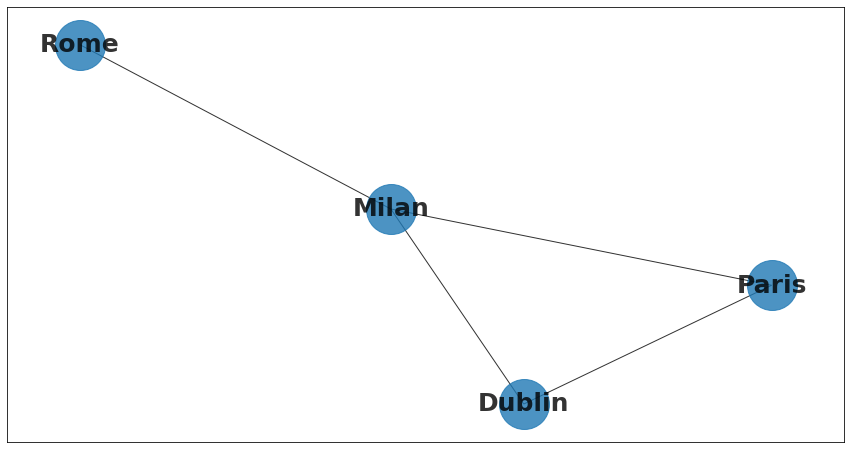

In [154]:
nx.draw_networkx(G,node_size=2500,font_weight=900,font_size=25,alpha=0.8)
fig=plt.gcf()
fig.set_figheight(8)
fig.set_figwidth(15)

**시각화 코드 정리**

In [155]:
def plot(G):
    nx.draw_networkx(G,node_size=2500,font_weight=900,font_size=25,alpha=0.8,arrowsize=20)
    fig=plt.gcf()
    fig.set_figheight(8)
    fig.set_figwidth(15)

`-` 속성체크

${\cal V}$, ${\cal E}$

In [156]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Milan', 'Paris']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Milan', 'Paris')]

**degree**

In [157]:
G.degree('Dublin'), G.degree('Rome'), G.degree('Milan'), G.degree('Paris')

**Order (노드들의 수), Size (엣지의 수)**

In [158]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")

Graph Order: 4
Graph Size: 4

**이웃**

In [159]:
list(G.neighbors('Dublin'))

In [160]:
list(G.neighbors('Rome'))

In [161]:
list(G.neighbors('Milan'))

In [162]:
list(G.neighbors('Paris'))

**Ego_graph**

<https://networkx.org/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html>

특정 노드를 중심으로 한 그래프

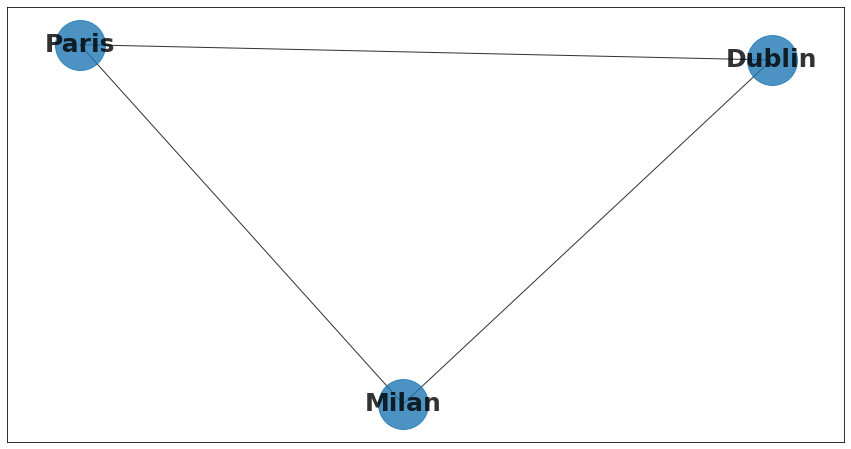

In [165]:
ego_graph = nx.ego_graph(G, "Dublin")
plot(ego_graph)

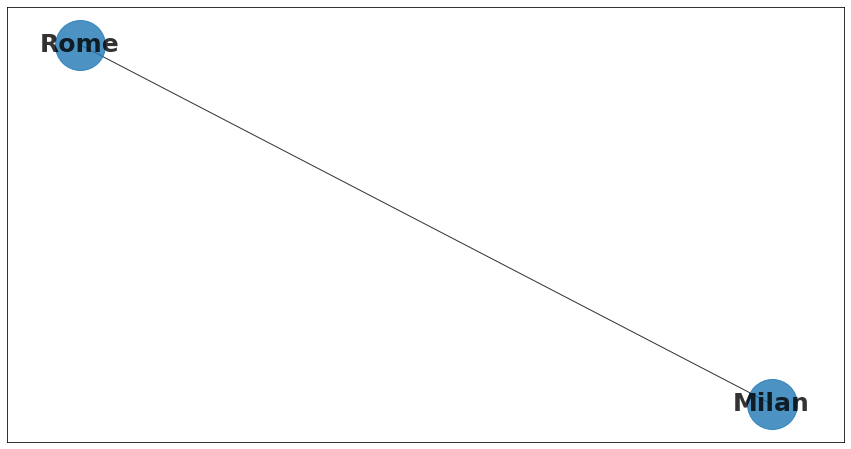

In [166]:
ego_graph = nx.ego_graph(G, "Rome")
plot(ego_graph)

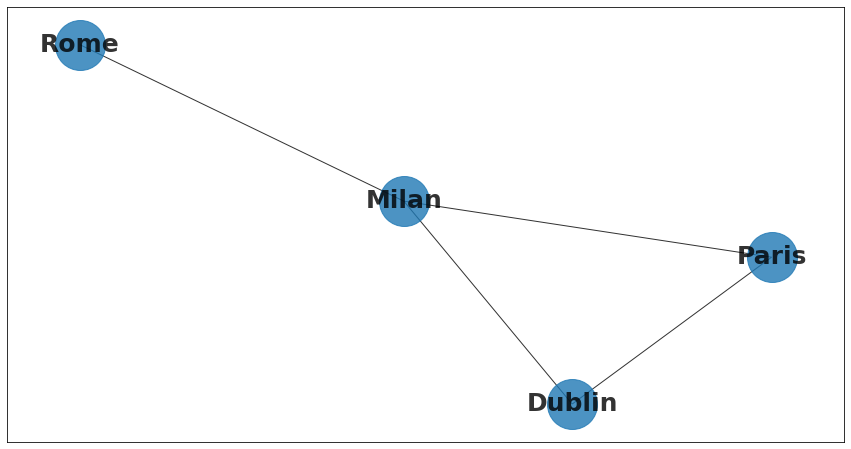

In [167]:
ego_graph = nx.ego_graph(G, "Milan")
plot(ego_graph)

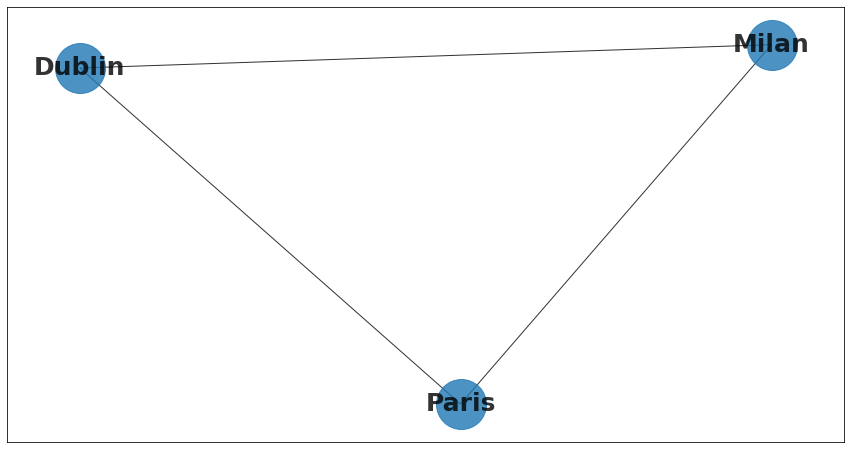

In [168]:
ego_graph = nx.ego_graph(G, "Paris")
plot(ego_graph)

`-` 노드와 엣지 추가.

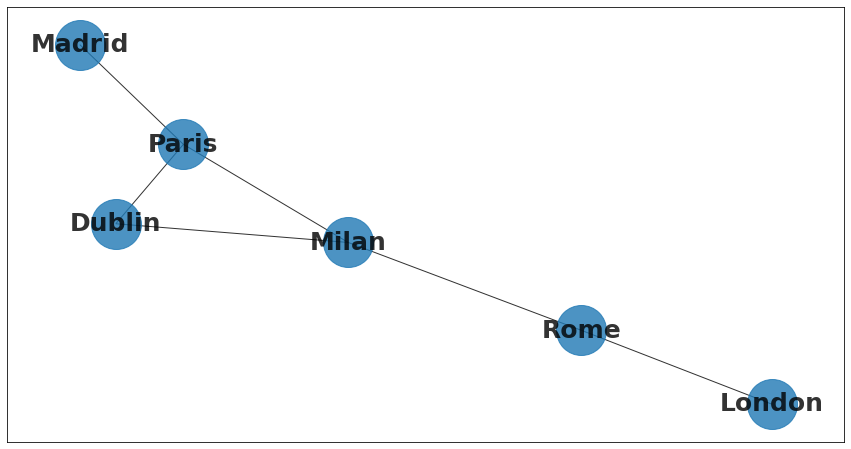

In [169]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
plot(G)

`-` 노드와 엣지 제거

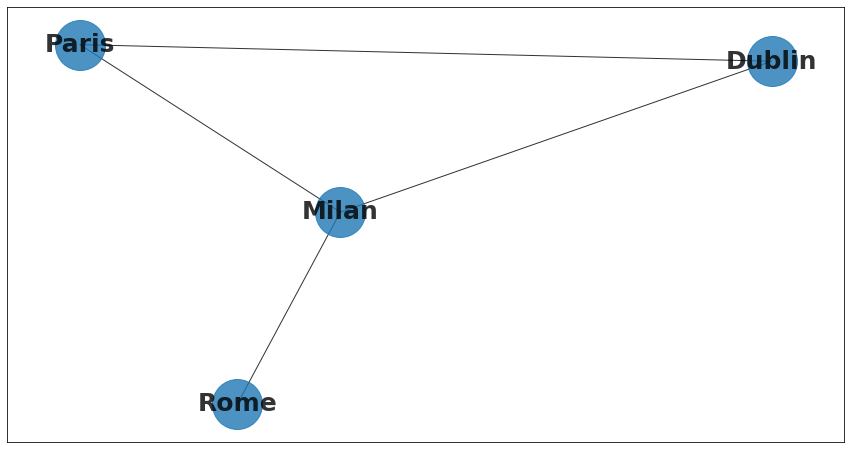

In [170]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
plot(G)

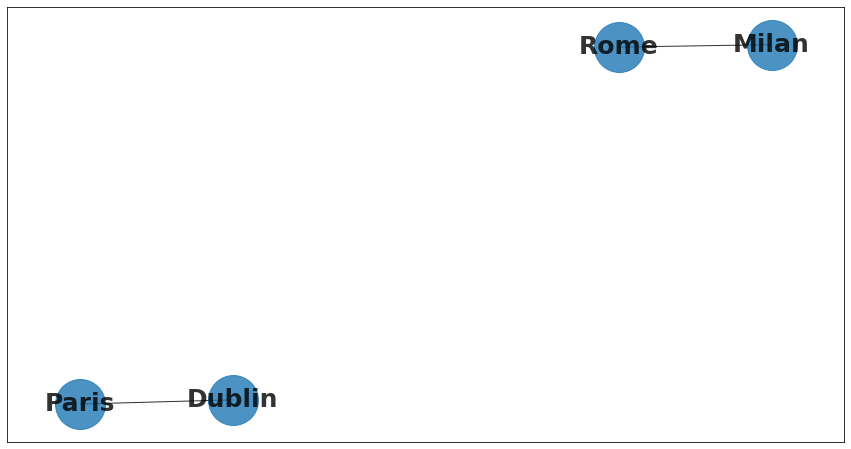

In [171]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
plot(G)

`-` 엣지의 리스트 출력

In [172]:
nx.to_edgelist(G)

In [173]:
G.edges # 이거랑 차이가 뭐임??

`-` 인접행렬 출력

In [174]:
nx.to_pandas_adjacency(G)

# Directed Graph

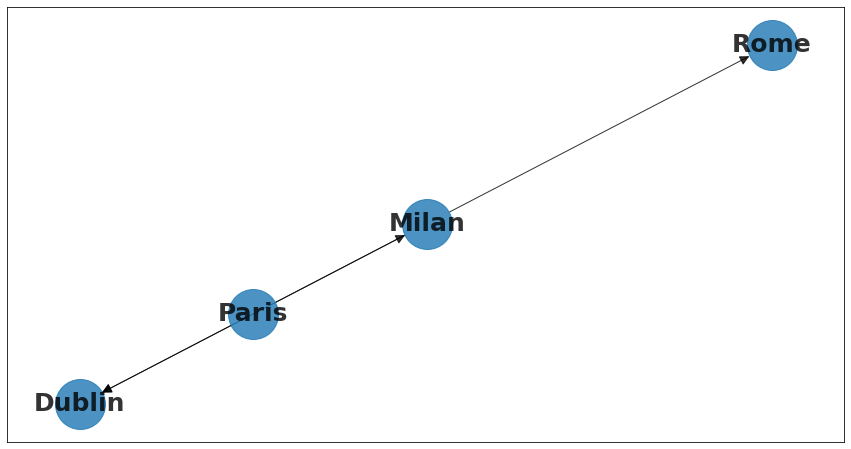

In [190]:
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
plot(G)

## Weighted Directed Graph

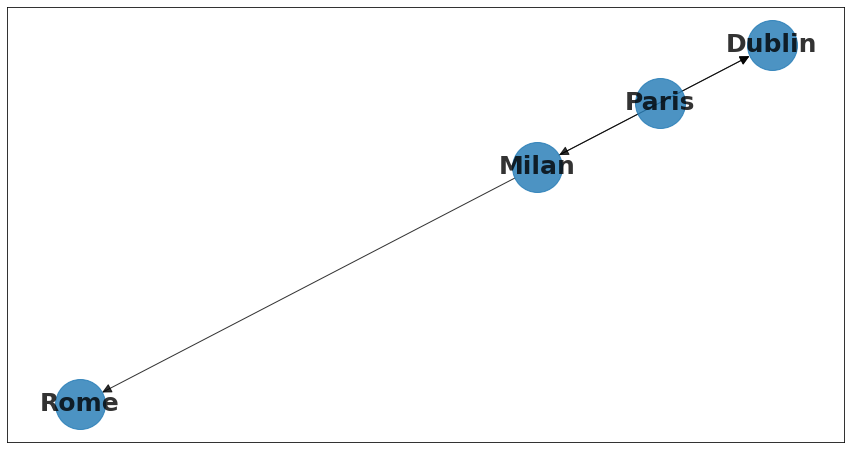

In [179]:
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
plot(G)

In [180]:
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

  source  target  weight
0  Milan    Rome       5
1  Milan  Dublin      19
2  Paris  Dublin      11
3  Paris   Milan       8
        Dublin  Rome  Milan  Paris
Dublin     0.0   0.0    0.0    0.0
Rome       0.0   0.0    0.0    0.0
Milan     19.0   5.0    0.0    0.0
Paris     11.0   0.0    8.0    0.0

## Bipartite Graph

In [181]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),  
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

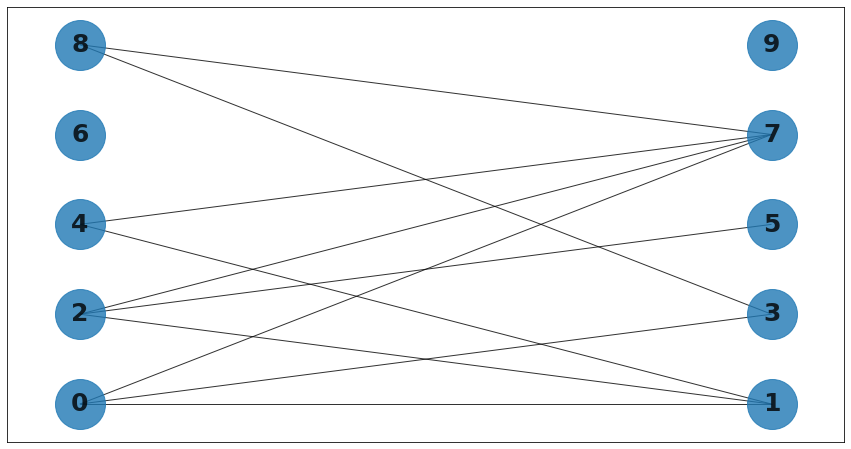

In [191]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos,node_size=2500,font_weight=900,font_size=25,alpha=0.8,arrowsize=20)
fig=plt.gcf()
fig.set_figheight(8)
fig.set_figwidth(15)

## Multi Graph

In [192]:
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

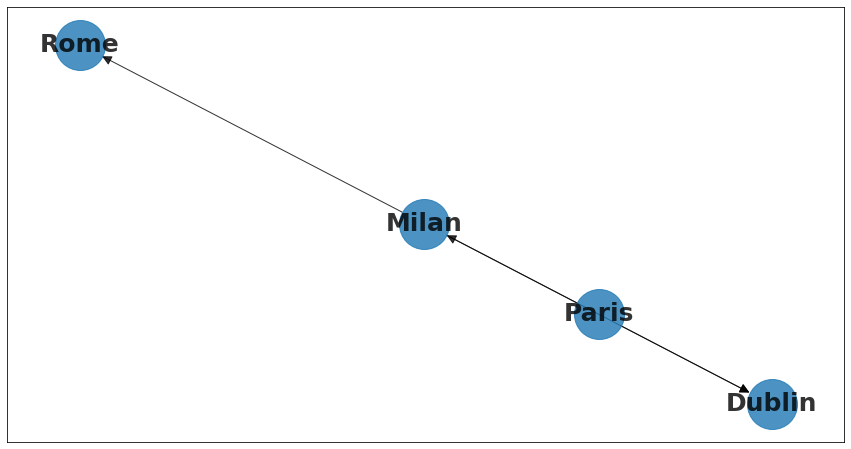

In [193]:
plot(G)

-   ??